## 4.3.1 Association Rules Implementation using Python

To practically apply the Apriori Algorithm concept, we use an example dataset containing retail transactions to demonstrate the implementation.  The dataset has four attributes representing the length and width of three species' sepals and petals: `Setosa`, `Virginica`, and `Versicolor`. 

Use the following Python codes to access the retail transaction dataset `fretail.xlsx` located in the `/data/` folder. The first few lines of Python codes are meant to ignore any warning messages.

In [1]:
# ignore all warning messages
import warnings
warnings.filterwarnings('ignore')
def warn(*args, **kwargs):
    pass
warnings.warn = warn

# access retail dataset 
import pandas as pd
df = pd.read_excel('data/fretail.xlsx')

We then need to select the attributes and set the data types correctly for further processing by the Apriori algorithm later. In this example, the `Description` and `InvoiceNo` attributes contain the items and invoice numbers of transactions that bear the transaction items. Based on the concept of Apriori Algorithms for market basket analysis, we need these two attributes' information to form the dataset for further analysis.

In [2]:
# set the attributes and data types for asosciation rules analysis
df["Description"] = df["Description"].astype(str)
df["InvoiceNo"] = df["InvoiceNo"].astype(str)

To calculate the frequency of each item in a transaction, we use the sum() function to count to frequency and group by invoice number representing a transaction. 

In [3]:
# calculate total item quantity of an InvoiceNo 
df = df.groupby(["InvoiceNo","Description"])["Quantity"].sum()

After counting the frequency of each item in each transaction contained in the dataset, the structure requires a reshape so that the frequency of all the items within the dataset matching each transaction can be captured. Those items that do not appear in a particular transaction will have a NULL frequency. We can use the unstack() function to realize the structure reshape. 

Figure 10 below diagrammatically elaborates the structure change after reshaping:

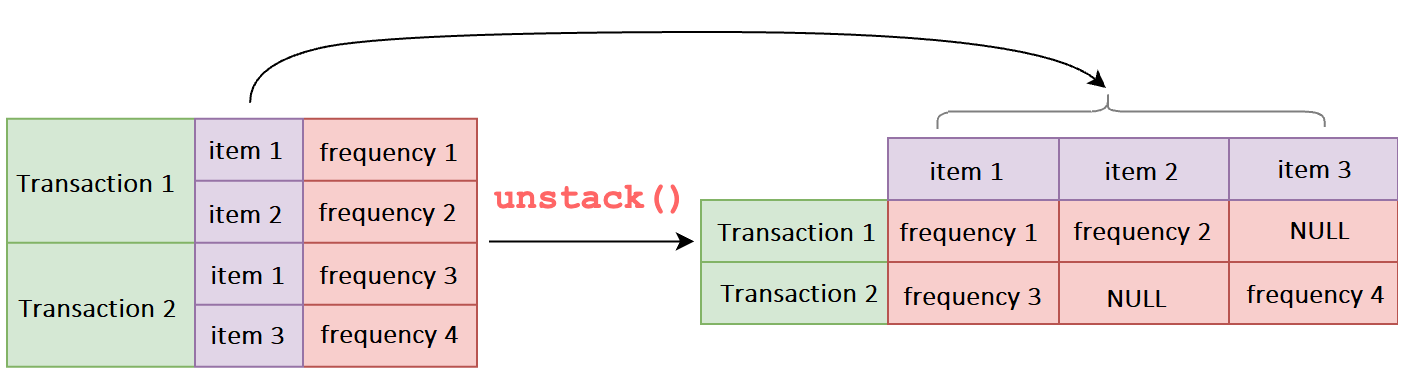

In [8]:
from IPython import display
display.Image("../learning_materials/unstack structure shape.png")

Figure 10 Restructure Dataset using the unstack() Python function

For those items that do not have any quantity (i.e. frequency), replace them with the value 0 using the `fillna() `function.

In [9]:
# to restrucutre the shape of dataset
df = df.unstack()

# to replace null with 0 value
df = df.fillna(0)

he concept of Apriori algorithms only concerns if an item occurs (i.e., becomes a binary value of either 0 or 1) in a transaction instead of the number of occurrences therefore, we convert the value to 1 if the occurrence is more or equal to 1, else 0 using the `applymap()` function.

In [10]:
# assign values to binary either 1 or 0
def reduce_to_binary(qty) : 
    if qty >= 1 :
        return 1
    if qty <= 0 :
        return 0
df = df.applymap(reduce_to_binary)

Once the dataset format is probably processed to suit the Apriori Algorithms, we can now perform the Association Rules method for data modeling. The following Python codes show examples of how we can implement an Apriori Algorithm for the Association Rules method using the Apriori library's `association_rules()` function. 

In this example, we user-defined the `minsup = 0.1` as the measure threshold for generating frequent itemsets. We specify the columns to observe a rule, including the `antecedents`, `consequent`, `support`, `confidence` and `lift`. The result of the frequent itemsets is sorted by the lift measure descendingly.

In [24]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# specify minsup = 0.07 to generte frequent itemsets
frequent_items = apriori(df, min_support=0.1, use_colnames=True)

# perform association rules modeling
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# select columns to observe a rule that containing frequent itemsets
rules = rules[['antecedents','consequents', 'support','confidence','lift']]

# sort rules by lift measure
rules = rules.sort_values(by = ["lift"], ascending=False)

# print the rules that contian frequent itemsets with threshold of minsup = 0.1
print(rules)

                              antecedents  \
13        (SET/6 RED SPOTTY PAPER PLATES)   
12          (SET/6 RED SPOTTY PAPER CUPS)   
10                              (POSTAGE)   
11  (ROUND SNACK BOXES SET OF4 WOODLAND )   
2                               (POSTAGE)   
3        (PLASTERS IN TIN CIRCUS PARADE )   
7                               (POSTAGE)   
6                    (RABBIT NIGHT LIGHT)   
8         (RED TOADSTOOL LED NIGHT LIGHT)   
9                               (POSTAGE)   
4      (PLASTERS IN TIN WOODLAND ANIMALS)   
5                               (POSTAGE)   
0               (LUNCH BAG RED RETROSPOT)   
1                               (POSTAGE)   

                              consequents   support  confidence      lift  
13          (SET/6 RED SPOTTY PAPER CUPS)  0.104121    0.960000  8.195556  
12        (SET/6 RED SPOTTY PAPER PLATES)  0.104121    0.888889  8.195556  
10  (ROUND SNACK BOXES SET OF4 WOODLAND )  0.125813    0.193333  1.437527  
11                  

After running the above codes, we can observe from the print(rules) result in Figure 11 that there are 14 rules with frequent itemsets satisfied the minsup = 0.1 threshold. 

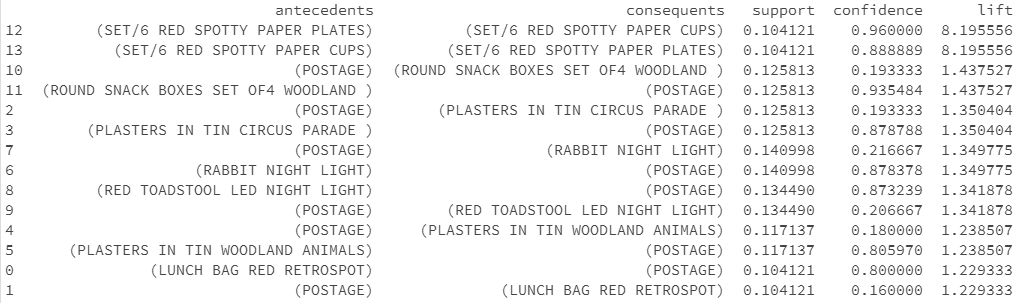

In [25]:
display.Image("../learning_materials/rules with frequent itemsets.png")

Figure 11 Rules with Frequent Itemsets

Once we have the list of rules containing frequent itemsets, we can use other measures such as Support, Confidence, and Lift to generate useful rules. The following example codes expect a threshold of Lift >=5, Confidence >= 0.9, and Support >=0.1. 

In [26]:
rules = rules[ (rules["lift"] >= 5) & (rules["confidence"] >= 0.9) & (rules["support"] >= 0.1)]
print(rules)

                        antecedents                    consequents   support  \
13  (SET/6 RED SPOTTY PAPER PLATES)  (SET/6 RED SPOTTY PAPER CUPS)  0.104121   

    confidence      lift  
13        0.96  8.195556  


After applying a tighter threshold for the measures above, we observe that there are only two rules qualified as useful rules that satisfy the threshold requirements.

The rule generated from the example retail transaction dataset implies the following:

- 10.4% percent of total transactions contain both itemsets (SET/6 RED SPOTTY PAPER PLATES) and  (SET/6 RED SPOTTY PAPER CUPS). 
- 96.0% percent chance someone will buy (SET/6 RED SPOTTY PAPER CUPS) when they picked (SET/6 RED SPOTTY PAPER PLATES).
- There is an 8.96 times increase in the expectation that someone will buy (SET/6 RED SPOTTY PAPER CUPS) when we know they bought (SET/6 RED SPOTTY PAPER PLATES).